In [39]:
%matplotlib widget
import os,sys
import csv
import copy
import math
import collections
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
sys.path.append("/pymorph")
from scipy.signal import find_peaks


from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import display, Math, Latex
from matplotlib import animation, rc

rc('animation', html='html5')

%load_ext autoreload
%autoreload 2
%matplotlib inline
#plt.style.use(['dark_background'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [315]:
verts = np.load(os.path.join('_output','dune_5_q_20cm_h_237mm_D50_0.8mm_verts.npy'))

In [316]:
verts.shape

(59, 800, 6)

In [317]:
# self._verts.append(list(zip(self._xc.copy(),self._zc.copy(), u.copy(), q.copy(), h.copy(), qbedload.copy())))
x = verts[1,:,0]
z = verts[1,:,1]

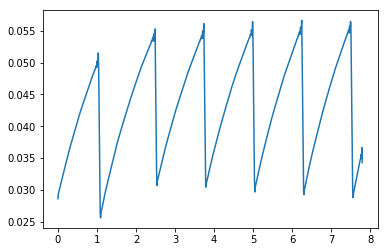

In [318]:
plt.plot(x,verts[45,:,1])

In [323]:
def calculate_wave_height( z):
    top_peaks, _ = find_peaks(z, height = z.mean()*1.1)
    bottom_peaks, _ = find_peaks(-1.*z, height = z.mean()*-0.8, distance = int(1.2/dx))

    ztop = [z[i] for i in top_peaks]
    zbottom = [z[i] for i in bottom_peaks]

    ztop = np.array(ztop)
    ztop = np.delete(ztop, ztop.argmin())
    
    zbottom = np.array(zbottom)
    zbottom = np.delete(zbottom, zbottom.argmax())
    

    return ztop.mean() - zbottom.mean()
                
            
    
def calculate_wave_length(z,dx):
    peaks, _ = find_peaks(-1.*z, height = z.mean()*-1., distance = int(1.2/dx))
    lengths = []
    last_peak = None
    for peak in peaks:
        if last_peak == None:
            last_peak = peak
        else:
            
            tmpLength = dx * (peak-last_peak)
            
            if tmpLength > 1.2:
                lengths.append(tmpLength)
                last_peak = peak
                
    lengths = np.array(lengths)
    #lengths = np.delete(lengths, lengths.argmin())
    return lengths
    
def calculate_wave_movement(last_peak_index, current_z):
    
    peaks, _ = find_peaks(-1.*current_z, height = current_z.mean()*-0.8, distance = int(1.2/dx))
    
    updated_peak = None
    for peak in peaks:
        if peak > last_peak_index:
            updated_peak = peak
            #print(peak, last_peak_index)
            break

    return updated_peak

def calculate_wave_speed(verts, dx, dt):
    last_peak_index = None
    velocities = []
    timesteps = []
    base_index = 2
    step_index = 4
    for t in range(0, (verts.shape[0]), step_index):
        current_z = verts[t,:,1]
        peaks, _  = find_peaks(-1.*current_z, height = -1*current_z.mean(), distance=100)
        if last_peak_index is not None:
            delta = calculate_wave_movement(last_peak_index, current_z)
            last_peak_index = peaks[base_index]
            velocities.append(delta*dx/(dt*step_index))
            timesteps.append( dt * t )
        last_peak_index = peaks[base_index]
    return velocities, timesteps

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app


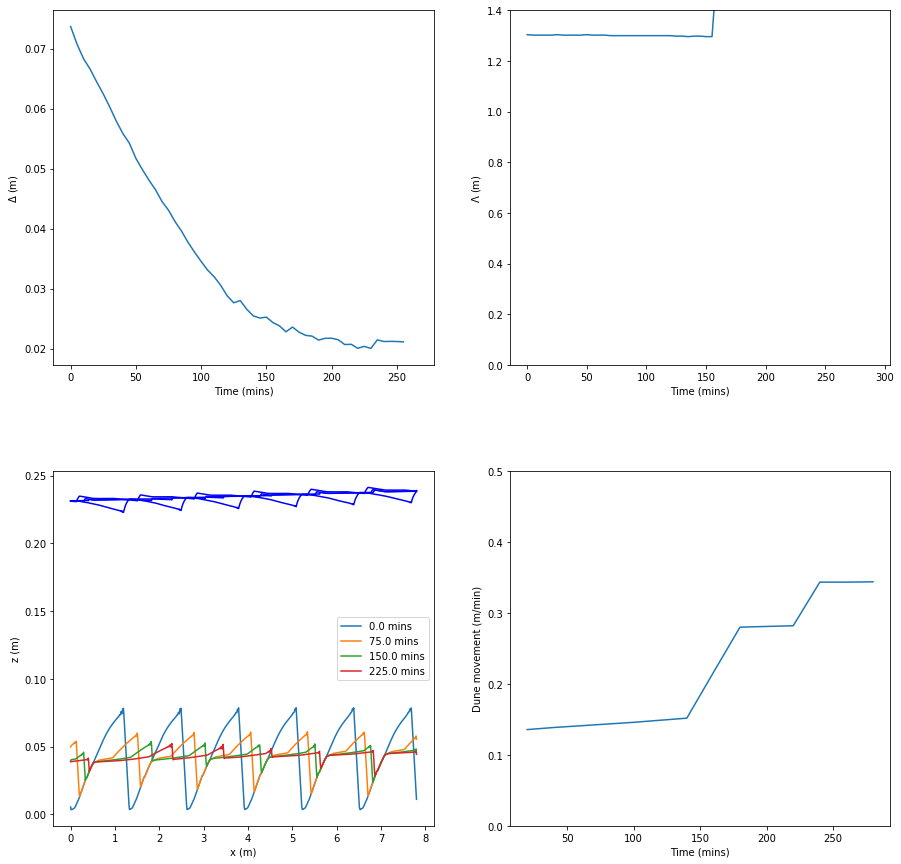

In [327]:
verts = np.load(os.path.join('_output','dune_5_q_20cm_h_237mm_D50_1mm_verts.npy'))


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

heights = [calculate_wave_height(verts[t,:,1]) for t in range((verts.shape[0]))]
times = [t*5. for t in range((verts.shape[0]))]

ax1.plot(times, heights)
ax1.set_xlabel('Time (mins)')
ax1.set_ylabel('$\Delta$ (m)')

dx = x[1] - x [0]
lengths = [calculate_wave_length(verts[t,:,1],dx).mean() for t in range((verts.shape[0]))]
ax2.plot(times, lengths)
ax2.set_xlabel('Time (mins)')
ax2.set_ylabel('$\Lambda$ (m)')
ax2.set_ylim([0, 1.4])

for t in range(0, (verts.shape[0]),15):
    z = verts[t,:,1]
    h = verts[t,:,4]
    x = verts[t,:,0]
    timestep = t * 5.
    ax3.plot(x,z, label='{0} mins'.format(timestep))
    ax3.plot(x,z+h, 'b')

ax3.legend()
ax3.set_xlabel('x (m)')
ax3.set_ylabel('z (m)')


v, timesteps = calculate_wave_speed(verts, dx, 5)
ax4.plot(timesteps,v)
ax4.set_ylim([0, 0.5])

ax4.set_xlabel('Time (mins)')
ax4.set_ylabel('Dune movement (m/min)')

f.subplots_adjust(hspace=0.3)

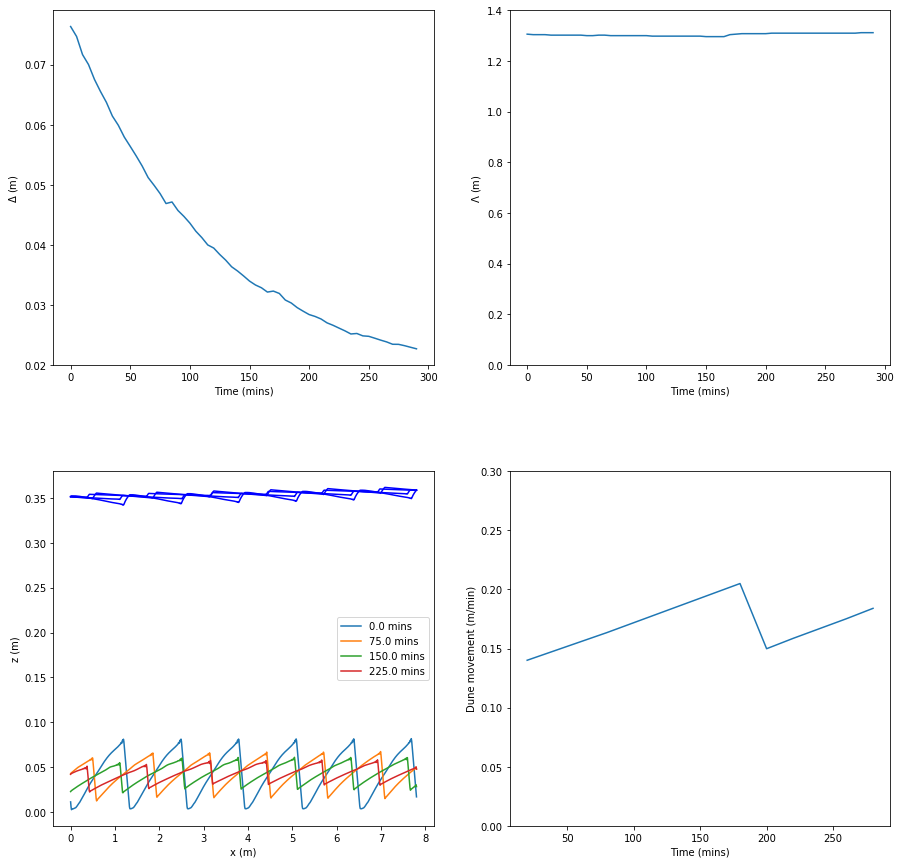

In [326]:
verts = np.load(os.path.join('_output','dune_5_q_32m_h_357mm_D50_1mm_verts.npy'))


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

heights = [calculate_wave_height(verts[t,:,1]) for t in range((verts.shape[0]))]
times = [t*5. for t in range((verts.shape[0]))]

ax1.plot(times, heights)
ax1.set_xlabel('Time (mins)')
ax1.set_ylabel('$\Delta$ (m)')

dx = x[1] - x [0]
lengths = [calculate_wave_length(verts[t,:,1],dx).mean() for t in range((verts.shape[0]))]
ax2.plot(times, lengths)
ax2.set_xlabel('Time (mins)')
ax2.set_ylabel('$\Lambda$ (m)')
ax2.set_ylim([0, 1.4])

for t in range(0, (verts.shape[0]),15):
    z = verts[t,:,1]
    h = verts[t,:,4]
    x = verts[t,:,0]
    timestep = t * 5.
    ax3.plot(x,z, label='{0} mins'.format(timestep))
    ax3.plot(x,z+h, 'b')

ax3.legend()
ax3.set_xlabel('x (m)')
ax3.set_ylabel('z (m)')


v, timesteps = calculate_wave_speed(verts, dx, 5)
ax4.plot(timesteps,v)
ax4.set_ylim([0, 0.3])

ax4.set_xlabel('Time (mins)')
ax4.set_ylabel('Dune movement (m/min)')

f.subplots_adjust(hspace=0.3)

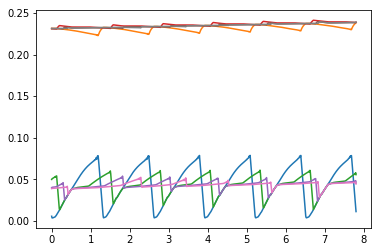

In [325]:
for t in range(0, (verts.shape[0]),15):
    z = verts[t,:,1]
    h = verts[t,:,4]
    x = verts[t,:,0]
    plt.plot(x,z)
    plt.plot(x,z+h)
    
    

array([  2, 139, 272, 405, 538, 671])

In [226]:
int(1.2/dx)

122

In [245]:
0.029286608260325406/300

9.762202753441802e-05

In [288]:
def calculate_wave_movement(last_peak_index, current_z):
    
    peaks, _ = find_peaks(-1.*current_z, height = current_z.mean()*-0.8, distance = int(1.2/dx))
    
    updated_peak = None
    for peak in peaks:
        if peak > last_peak_index:
            updated_peak = peak
            print(peak, last_peak_index)
            break

    return updated_peak

def calculate_wave_speed(verts, dx, dt):
    last_peak_index = None
    velocities = []
    base_index = 2
    step_index = 4
    for t in range(0, (verts.shape[0]), step_index):
        current_z = verts[t,:,1]
        peaks, _  = find_peaks(-1.*current_z, height = -1*current_z.mean(), distance=100)
        if last_peak_index is not None:
            delta = calculate_wave_movement(last_peak_index, current_z)
            last_peak_index = peaks[base_index]
            velocities.append(delta*dx/(dt*step_index))
        last_peak_index = peaks[base_index]
    return velocities

287 272
302 287
317 302
333 317
349 333
365 349
381 365
398 381
414 398
301 285
317 301
334 317
350 334
367 350


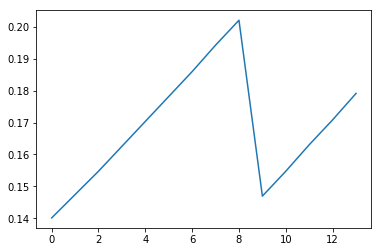

In [291]:
v = calculate_wave_speed(verts, dx, 5)
plt.plot(v)

In [292]:
v

[0.14008760951188987,
 0.1474092615769712,
 0.15473091364205255,
 0.16254067584480597,
 0.17035043804755942,
 0.17816020025031287,
 0.18596996245306632,
 0.19426783479349186,
 0.2020775969962453,
 0.14692115143929912,
 0.15473091364205255,
 0.16302878598247808,
 0.17083854818523153,
 0.17913642052565706]